In [211]:
# %load /Users/shleifer/flow/notes/preamble.py
import sys
sys.path = ['/Users/shleifer/flow/kensho-learn/', '/app/', '.'] + sys.path
%load_ext autoreload
%autoreload 2
%matplotlib inline
#from klearn.nb_start import *
%config InlineBackend.figure_format = 'retina'
from lane_lines.nb_start import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from lane_lines.fit_poly import rgb_read
from detection.window import slide_window

In [13]:
from detection.lesson_functions import *
from detection.utils import *

In [562]:
non_vehicles = glob.glob('non-vehicles/*/*')
vehicles = glob.glob('vehicles/*/*')

In [16]:
from lane_lines.viz import plot_side_by_side

In [57]:
y_start_stop = [400, 800]

In [166]:
from sklearn.utils import shuffle

In [456]:
from detection.constants import PARAMS

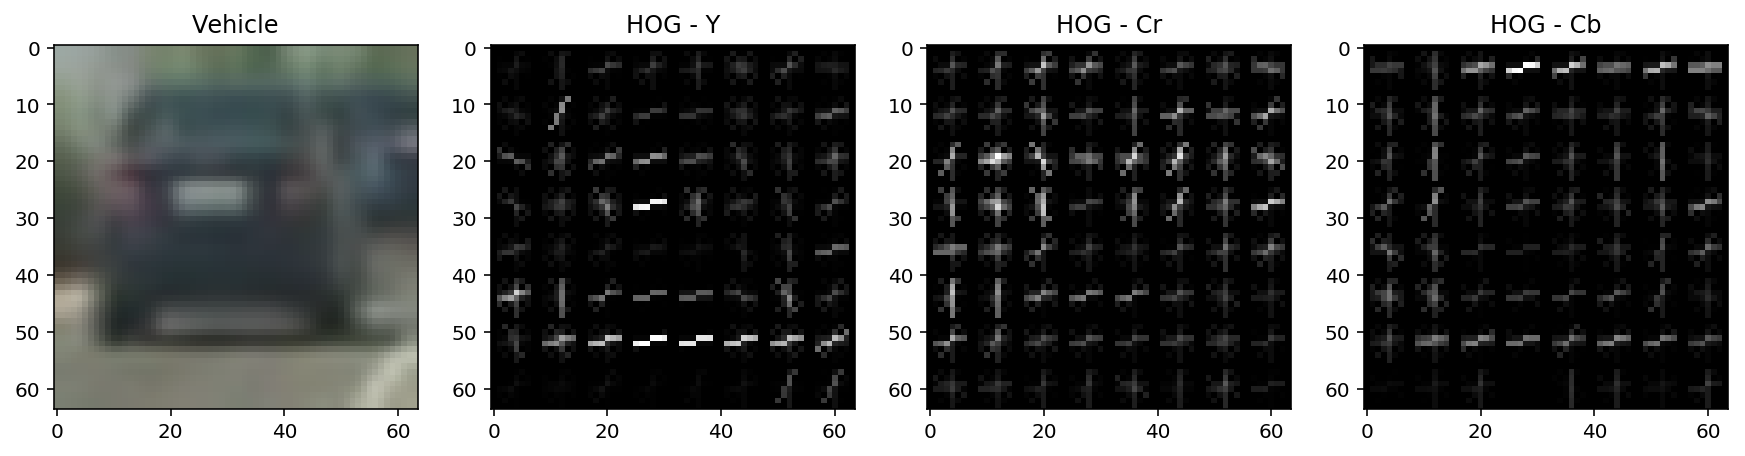

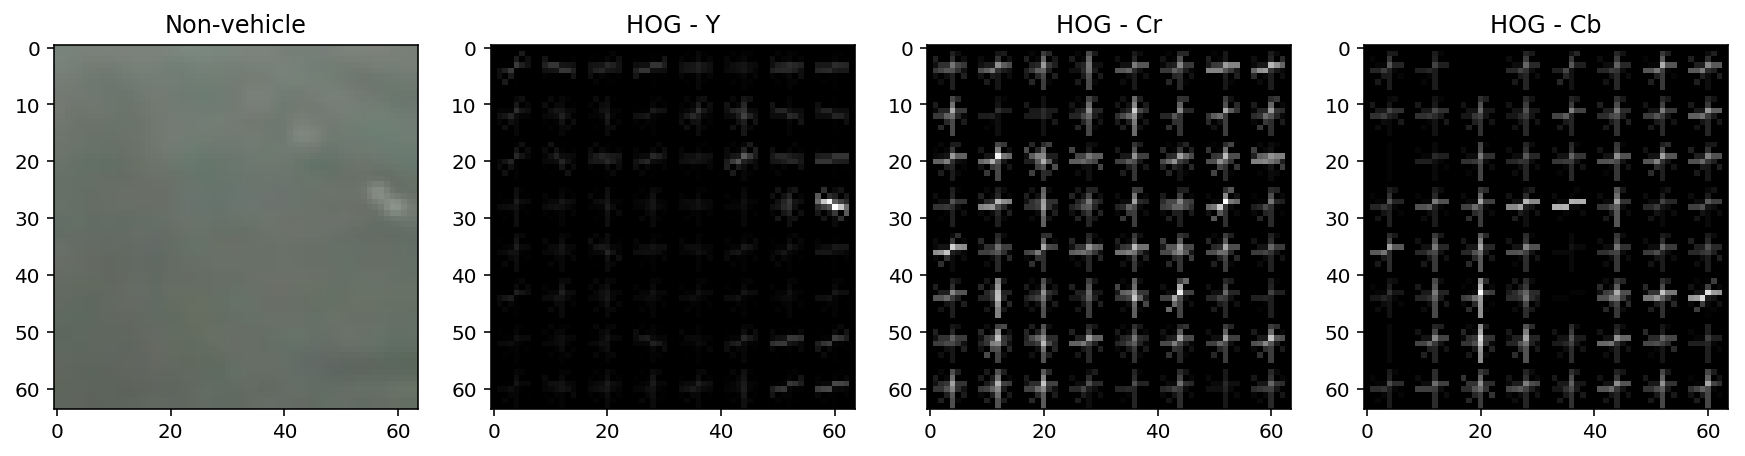

In [557]:
def showHOG(img, title):
    """
    Calculate HOG on the image `img` and the YCrCb color space and show them on a graph.
    """
    img_cspaced = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

    _, hog_y = get_hog_features(img_cspaced[:,:,0],
                                PARAMS['orient'],
                                PARAMS['pix_per_cell'],
                                 PARAMS['cell_per_block'],
                                vis=True, feature_vec=True)
    _, hog_Cr = get_hog_features(img_cspaced[:,:,1],
                                PARAMS['orient'],
                                PARAMS['pix_per_cell'],
                                 PARAMS['cell_per_block'],
                                vis=True, feature_vec=True)    
    _, hog_Cb = get_hog_features(img_cspaced[:,:,2],
                    PARAMS['orient'],
                    PARAMS['pix_per_cell'],
                     PARAMS['cell_per_block'],
                    vis=True, feature_vec=True)
    fig, axes = plt.subplots(ncols=4, figsize=(15,15))
    axes[0].imshow(img)
    axes[0].set_title(title)
    axes[1].imshow(hog_y, cmap='gray')
    axes[1].set_title('HOG - Y')
    axes[2].imshow(hog_Cr, cmap='gray')
    axes[2].set_title('HOG - Cr')
    axes[3].imshow(hog_Cb, cmap='gray')
    axes[3].set_title('HOG - Cb')

showHOG(rgb_read(vehicles[0]), 'Vehicle')
showHOG(rgb_read(non_vehicles[0]), 'Non-vehicle')

In [559]:
len(vehicles)

8792

In [563]:
len(non_vehicles)

8968

In [564]:
%%time
X = [single_img_features(rgb_read(path), **PARAMS) 
     for path in (
    vehicles + non_vehicles)]
Xmat = np.vstack(X)

CPU times: user 1min 37s, sys: 4.51 s, total: 1min 41s
Wall time: 1min 51s


In [565]:
import pickle
pickle.dump(Xmat, open('Xmat_darien.pkl', 'wb'))

In [566]:
len(vehicles)

8792

In [567]:
len(non_vehicles)

8968

In [568]:
#Xmat[0].shape

In [569]:
y = np.concatenate([np.ones(len(vehicles)),np.zeros(len(non_vehicles))])

In [269]:
rand_state = 42

In [572]:

X_train, X_test, y_train, y_test = train_test_split(
    Xmat, y, test_size=0.2, random_state=rand_state)


In [573]:
from sklearn.ensemble import GradientBoostingClassifier

In [574]:
#clf =  make_pipeline(StandardScaler(), LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced'))
clf =  make_pipeline(StandardScaler(), LinearSVC(random_state=42,))

In [575]:
%%time
clf.fit(X_train, y_train)
print('Test Accuracy = ', round(clf.score(X_test, y_test), 4))

Test Accuracy =  0.9904
CPU times: user 14.9 s, sys: 1.71 s, total: 16.6 s
Wall time: 17.3 s


In [576]:
clf.fit(Xmat, y)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))])

In [577]:
t=time.time()
n_predict = 10
print('My SVC predicts: ', clf.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:  [ 0.  0.  0.  1.  1.  1.  1.  0.  0.  0.]
For these 10 labels:  [ 0.  0.  0.  1.  1.  1.  1.  0.  0.  0.]
0.0027 Seconds to predict 10 labels with SVC


In [465]:
# fpr, tpr, thresholds = roc_curve(y_test, probas, pos_label=1)
# auc(fpr, tpr)

# from sklearn.metrics import *

# def confusion_df(clf, y_true, x_test, norm=False):
#     '''make a dataframe of confusion matrix
#     Args:
#         clf: a sklearn classifier which implements predict
#         y_true: actual values of y
#         x_test: to use to predict
#         norm: (default False). if True, normalized rows to sum to 1
#     Returns a pandas df which looks like
#         Predicted    False   True
#         Actual
#         False       1005    19
#         True        7       100
#     '''
#     cm = confusion_matrix(y_true, clf.predict(x_test))
#     if norm:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     cm = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
#     cm.index.name = 'Actual'
#     cm.columns.name = 'Predicted'
#     return cm

# confusion_df(clf, y_test, X_test)

# #non_vehicles

In [578]:
from detection.window import slide_window
image = rgb_read('test_images/test1.jpg')

In [579]:
feat = single_img_features(cv2.resize(image, (64,64)), **PARAMS)

In [580]:
clf.predict(feat.reshape(1,-1))

array([ 0.])

In [581]:
feat.shape

(6156,)

In [582]:
from detection.constants import *

In [583]:
from detection.search_classify import search_windows
from detection.heatmap import get_heatmap, draw_heat

In [585]:
from detection.video import process_image

In [586]:
from detection.window import make_many_windows

In [587]:
test_paths = glob.glob('test_images/*')

In [646]:
k  =clip1.get_frame(100)

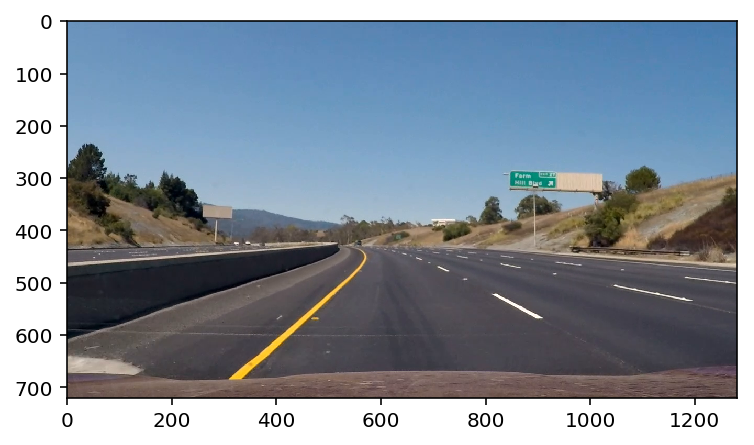

In [647]:
plt.imshow(process_image(k, clf))

test_images/test1.jpg


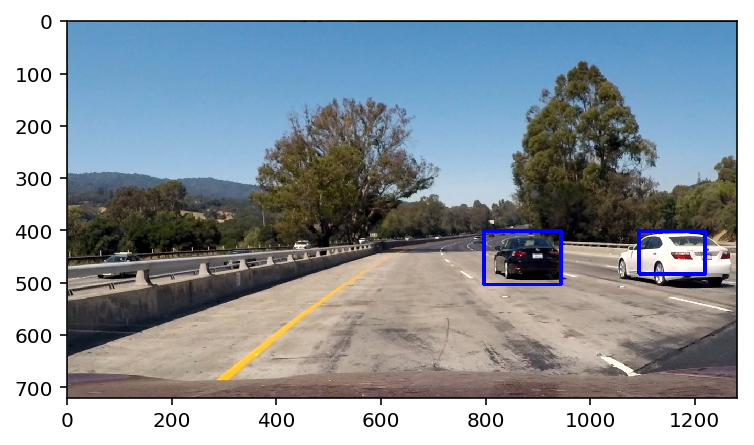

test_images/test2.jpg


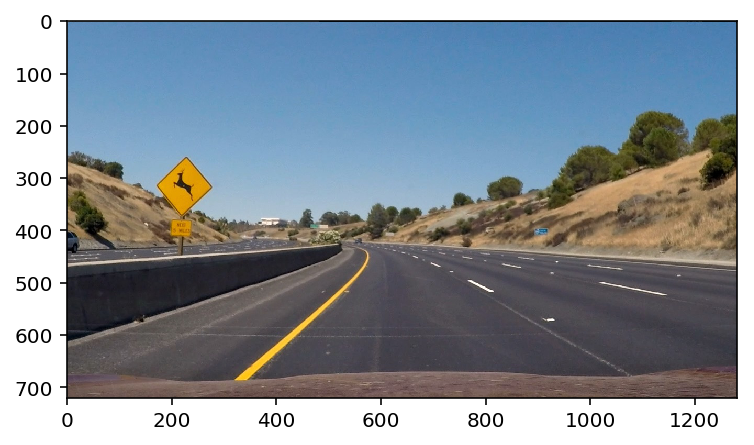

test_images/test3.jpg


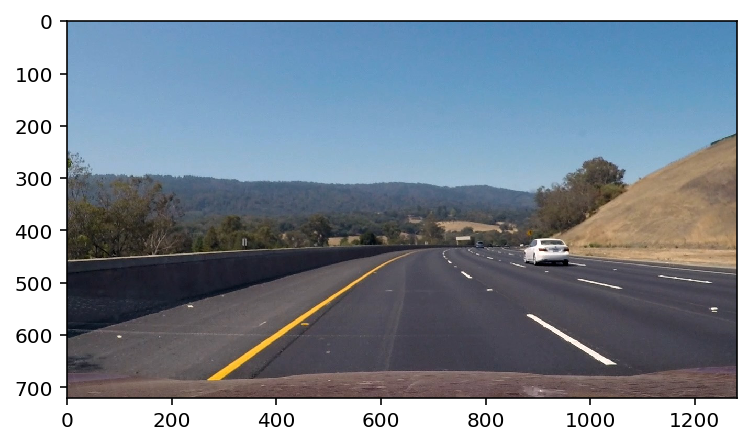

test_images/test4.jpg


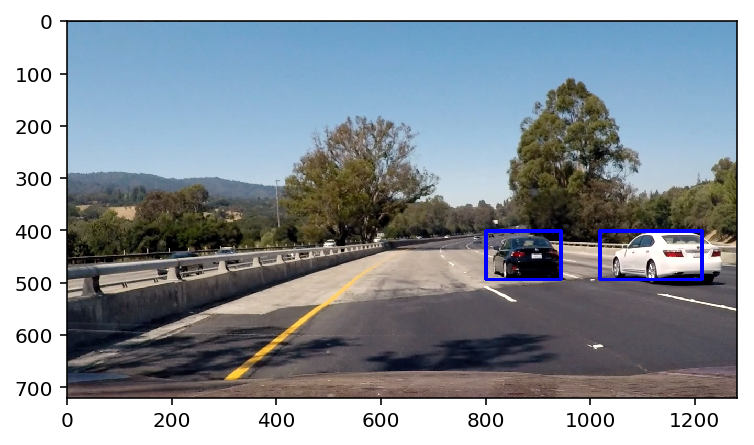

test_images/test5.jpg


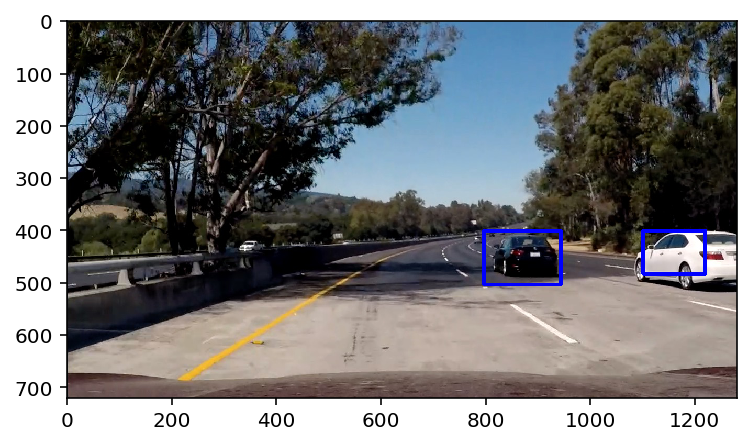

test_images/test6.jpg


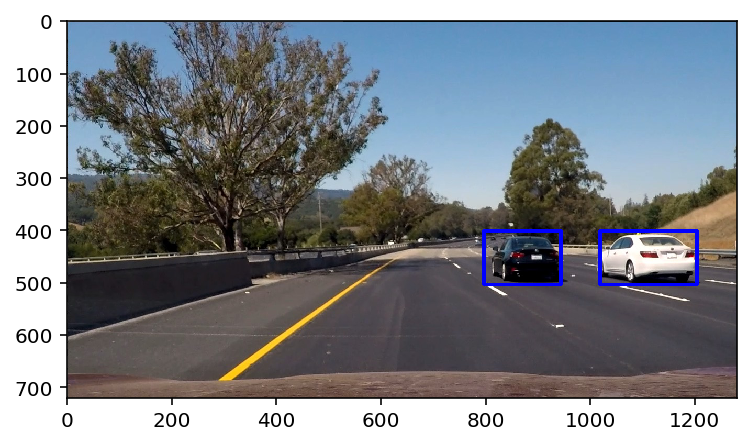

In [649]:
for path in test_paths:
    print(path)
    plt.imshow(process_image(rgb_read(path),
                             clf, search_params=PARAMS))
    plt.show()

In [655]:
bug = clip1.get_frame(.6)

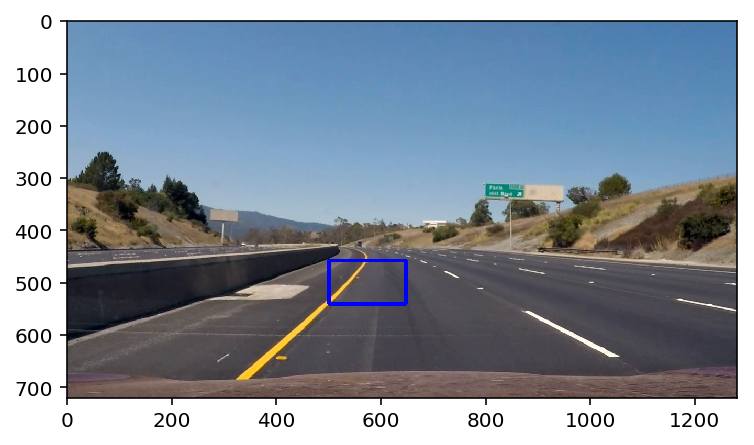

In [660]:
plt.imshow(process_image(bug, clf))

In [589]:
from detection.find_cars import find_cars
from detection.constants import PARAMS
import cv2
from lane_lines.nb_start import *
from detection.lesson_functions import *
from detection.constants import PARAMS

In [596]:
windows = make_many_windows(img)

In [597]:
 hot_windows = search_windows(image, windows, clf, **PARAMS)

In [541]:
s1 = slice(window[0][1],window[1][1])
s2 = slice(window[0][0], window[1][0])

In [648]:
#plt.imshow(image[s1,  s2])

In [518]:

from detection.find_cars import find_cars

In [610]:
from moviepy.editor import VideoFileClip, ImageSequenceClip


final_output = 'P5_final.mp4'
clip1 = VideoFileClip("project_video.mp4").subclip(0,1)

In [616]:
from detection.video import video_pipeline
from scipy.ndimage.measurements import label

In [614]:
windows = make_many_windows(image)
hot_windows = search_windows(image, windows, clf, **PARAMS)
heatmap = get_heatmap(hot_windows, image, threshold=threshold)

In [617]:
labels = label(heatmap)

In [629]:
from detection.heatmap import get_bboxes

In [634]:
%%time

imgs, heat = video_pipeline(clip1, clf)

7it [00:07,  1.07s/it]

((500, 484), (619, 540)) []
((500, 484), (619, 540)) []
((500, 484), (619, 540)) []
((500, 484), (619, 540)) [((500, 484), (619, 540))]
((500, 484), (619, 540)) []


8it [00:08,  1.06s/it]

((500, 484), (619, 540)) []
((500, 484), (619, 540)) []
((500, 484), (619, 540)) [((500, 484), (619, 540))]
((500, 484), (619, 540)) []
((500, 484), (619, 540)) [((500, 484), (619, 540))]


9it [00:09,  1.07s/it]

((500, 484), (619, 540)) []
((500, 484), (619, 540)) [((500, 484), (619, 540))]
((500, 484), (619, 540)) []
((500, 484), (619, 540)) [((500, 484), (619, 540))]
((500, 484), (619, 540)) [((500, 484), (619, 540)), ((500, 484), (619, 540))]


15it [00:16,  1.15s/it]

((500, 452), (647, 540)) []
((500, 452), (647, 540)) []
((500, 452), (647, 540)) []
((500, 452), (647, 540)) []
((500, 452), (647, 540)) []


16it [00:17,  1.21s/it]

((500, 457), (647, 540)) []
((500, 457), (647, 540)) []
((500, 457), (647, 540)) []
((500, 457), (647, 540)) []
((500, 457), (647, 540)) []


17it [00:19,  1.28s/it]

((500, 457), (647, 540)) []
((500, 457), (647, 540)) []
((500, 457), (647, 540)) []
((500, 457), (647, 540)) []
((500, 457), (647, 540)) []


18it [00:20,  1.21s/it]

((500, 452), (675, 555)) []
((500, 452), (675, 555)) []
((500, 452), (675, 555)) []
((500, 452), (675, 555)) []
((500, 452), (675, 555)) []


25it [00:27,  1.04s/it]

CPU times: user 27 s, sys: 317 ms, total: 27.3 s
Wall time: 27.5 s


In [635]:
myvid = ImageSequenceClip(imgs, fps=10)

In [636]:
myvid.ipython_display()

100%|██████████| 26/26 [00:00<00:00, 112.35it/s]


In [ ]:

#white_clip = clip1.fl_image(save_image)
#plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
%time final_clip.write_videofile(final_output, audio=False)